# Chapter 2 Multi-arm Bandits

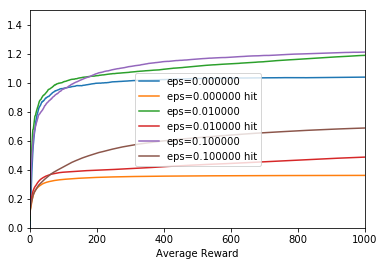

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class Bandit(object):
    def __init__(self, n_arm=10, eps=0.1, q_dist=None):
        self.n_arm_ = n_arm
        self.eps_ = eps
        self.q_ = np.zeros(self.n_arm_, dtype=np.float32)
        self.reward_ = np.zeros(self.n_arm_, dtype=np.float32)
        self.times_ = np.zeros(self.n_arm_, dtype=np.float32)
        if q_dist is None:
            self.q_dist_ = np.random.randn(self.n_arm_)
        else:
            self.q_dist_ = q_dist
        self.best_action_ = np.argmax(self.q_dist_)
        self.hit_best_ = 0
    def reset(self):
        self.q_ = np.zeros(self.n_arm_, dtype=np.float32)
        self.reward_ = np.zeros(self.n_arm_, dtype=np.float32)
        self.times_ = np.zeros(self.n_arm_, dtype=np.float32)
        self.q_dist_ = np.random.randn(self.n_arm_)
        self.best_action_ = np.argmax(self.q_dist_)
        self.hit_best_ = 0
    def reward(self, q=0):
        return lambda: q+np.random.randn()
    def act(self, action):
        self.times_[action]+= 1
        reward = self.q_dist_[action]+np.random.randn()
        self.reward_[action] += reward
        self.q_[action] += (reward-self.q_[action]) / self.times_[action ]
        self.hit_best_ += 1 if action==self.best_action_ else 0
#         self.q_[action] = self.reward_[action]/self.times_[action]
    def genmove(self, greedy=False):
        if greedy or np.random.random()>self.eps_:
            return np.argmax(self.q_)
        else:
            return np.random.randint(self.n_arm_)
    def average_reward(self):
        return np.sum(self.reward_) / np.sum(self.times_)
    def average_hit(self):
        return self.hit_best_ / np.sum(self.times_)
def test_bandit(bandit, times, n_steps):
    avg_reward = np.zeros(n_steps, dtype=np.float32)
    avg_hit = np.zeros(n_steps, dtype=np.float32)
    for _ in range(times):
        bandit.reset()
        n_steps = 1000
        for i in range(n_steps):
            bandit.act(bandit.genmove())
            avg_reward[i] += bandit.average_reward()
            avg_hit[i] += bandit.average_hit()
    avg_reward /= times
    avg_hit /= times
    plt.plot(avg_reward, label='eps=%f'%(bandit.eps_))
    plt.plot(avg_hit, label='eps=%f hit'%(bandit.eps_))

if __name__ == '__main__':
#     q_dist = np.random.randn(10)
#     q_dist = [0.3, -0.8, 1.5, 0.5, 1.2, -1.7, -0.2, -1.2, 0.8, -0.5]
    n_times = 200
    n_steps = 1000
    test_bandit(Bandit(eps=0),n_times,n_steps)
    test_bandit(Bandit(eps=0.01),n_times,n_steps)
    test_bandit(Bandit(eps=0.1),n_times,n_steps)
    plt.legend()
    plt.xlim(1,n_steps)
    plt.xlabel('Steps')
    plt.ylim(0,1.5)
    plt.xlabel('Average Reward')
    plt.show()